# Using Pandas to Explore Simpson's Paradox (Stanford Admissions Data)

In 1973, the University of California-Berkeley was sued for sex discrimination. The numbers looked pretty incriminating: the graduate schools had just accepted 44% of male applicants but only 35% of female applicants. When researchers looked at the evidence, though, they uncovered something surprising:

>*If the data are properly pooled...there is a small but statistically significant bias in favor of women.*
<br>**(p. 403)**

 ***Text from [Visualizaing Urban Data Idea Lab](http://vudlab.com/simpsons/)***
It was a textbook case of Simpson's paradox.

What is Simpson's paradox?

Every Simpson's paradox involves at least three variables:

1.  the explained
2.  the observed explanatory
3.  the lurking explanatory

If the effect of the observed explanatory variable on the explained variable changes directions when you account for the lurking explanatory variable, you've got a Simpson's Paradox.

By "properly pooled," the investigators at Berkeley meant "broken down by department." Men more often applied to science departments, while women inclined towards humanities. Science departments require special technical skills but accept a large percentage of qualified applicants. In contrast, humanities departments only require a standard undergrad curriculum but have fewer slots.  Let's examine this data in Python Pandas.  The first task is to see how the original claim of "sex discrimination against women college applicants at Stanford".  

In [200]:
#############################################
# Import our modules
#############################################

import pandas as pd
import requests
import numpy as np
from pandas import Series,DataFrame

############################################
# Getting our data
############################################

# Pandas can read csv directly from a url or from disk
df = pd.read_csv('http://www.calvin.edu/~stob/data/Berkeley.csv')

#converting columns to categorical features
df['Gender']=df['Gender'].astype('category')
df['Admit']=df['Admit'].astype('category')
df['Dept']=df['Dept'].astype('category')

# Let's see the data as a pandas dataframe
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


Note above that we converted our generic dataframe objects into categorical objects.  This is an important step where the data has categorical data, which is supported by `pandas`.  Next, we use the [Group By: split-apply-combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html) tools from the [`pandas`](http://pandas.pydata.org/) library to group our data by 'gender' to explore the admitted/rejected rates. `groupby` operations will be very familiar to SQL based analysis where you can write the query:

```mysql

SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2

```

In [201]:
# groupby gender
obj = df.groupby(['Gender','Admit'])

# uncomment to see all the methods available to grouped data
#dir(obj)

# show our new grouped dataframe
df2 = obj.sum()
df2

Freq
Gender Admit         
Female Admitted   557
       Rejected  1278
Male   Admitted  1198
       Rejected  1493

`df2` is a [multiindex dataframe](http://pandas.pydata.org/pandas-docs/stable/advanced.html) (index on gender and index on Admit).  

## Visualization

`pandas` provides an [unstack method to work with multiindexed dataframes](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html).  Combining the unstack method with the [embedded visualization tools of `pandas`](http://pandas.pydata.org/pandas-docs/stable/visualization.html) creates a powerful combination for [quick visualization](http://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index) of [categorical data(http://pandas.pydata.org/pandas-docs/stable/categorical.html).  We use all the methods above to plot our data, and see if there is "sex discrimination in the admissions process".  

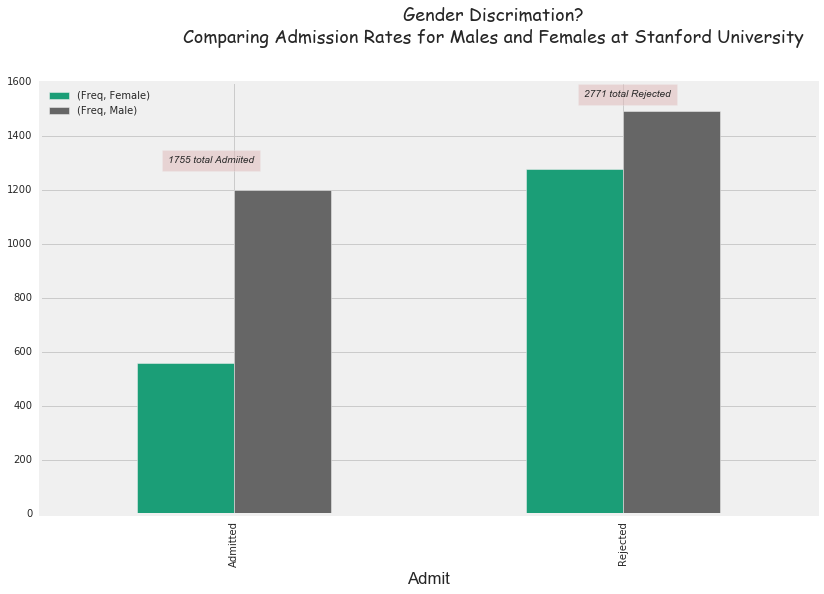

In [199]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# make plots inline to the jupyter notebook; comment out if you want interactive plots
%matplotlib inline

# Documentation http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
# To learn more about unstack, read here http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html

df2.unstack(level=0).plot(
    kind='bar',
    layout=(1,2),
    colormap='Dark2',
    sharey='True',
    figsize=(15,8), 
)
csfont = {'fontname':'Comic Sans MS'}

plt.suptitle('Gender Discrimation?\nComparing Admission Rates for Males and Females at Stanford University\n',fontsize=18,**csfont)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.85)
plt.legend(loc=0)
plt.text(-0.17, 1300, '1755 total Admiited', style='italic',bbox={'facecolor':'#E0B8B8', 'alpha':0.5, 'pad':6})
plt.text(0.9, 1545, '2771 total Rejected', style='italic',bbox={'facecolor':'#E0B8B8', 'alpha':0.5, 'pad':6})
plt.style.use('fivethirtyeight')
plt.show()

Based on these figures, we see where the argument for "discrimination" comes from (pay attention to the left block in each subplot). Proportionally, male applicants are accepted at a higher rate than their female counterparts. Is the case closed? Maybe not.

What if we added another dimension to the data?  Let's add the department variable to this problem, and plot the relationship of gender and admission rates.  It's not a far stretch to assume that departments (i.e. major areas of study) have different acceptance rates.  `pandas` makes this an easy task with the groupby method.  

In [142]:
# adding the department dimension to our multiindex
obj3 = df.groupby(['Gender','Admit','Dept'])

# making a dataframe
df3 = obj2.sum()

Now let's visualize the relationship between gender, admission rates, and departments.  

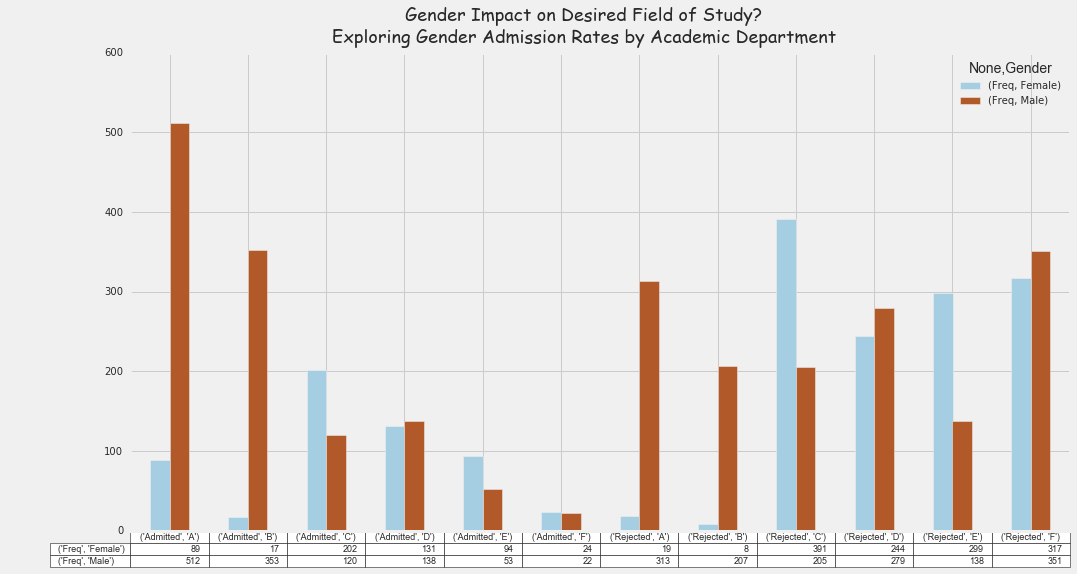

In [195]:
df3.unstack(level=-3).plot(
    kind='bar',
    colormap='Paired',
    sharey=True,
    figsize=(15,8),
    table=True,
    xticks=([30])
)

plt.xticks=([])
# plt.subplots_adjust(bottom=0.1, right=0.8, top=1.5)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

plt.suptitle('Gender Impact on Desired Field of Study?\nExploring Gender Admission Rates by Academic Department\n',fontsize=18,**csfont)

plt.style.use('fivethirtyeight')
plt.xlabel("")
plt.show()

The graphic shows clearly that some departments accept nearly twice as many female applicants compared to male applicants.  Moreover, a few departments (e.g. Department E) with high female acceptance rates have high female rejection rates, suggestion a lack of "open slots" as a reason for the rejections.  Bringing this full circle, this data suggests female applicants are applying for admission into a focused grouping of Departments.  

Therefore, rejection rates are influenced by their decision to apply into certain departments and the underlying limitation of available slots in those departments. Further analysis could focus on the relationship between gender and admission and total applications for admission by gender in each department.  Below, we wrap up with some basic arithmetic exploring the data.  This is extra, since we've already called into question the claim of "sex discrimination" and shifted the analysis to question the impact gender has on the intended field of study in college.     

In [192]:
# Establishing some basic numbers and figures for the data
obj2 = df.groupby(['Gender','Admit','Dept'])

df3 = obj2.sum()
totalApps = df.Freq.sum() # total applicants 
totalFems = float(df3['Freq']['Female'].sum())  # total female applicants
totalMals = float(df3['Freq']['Male'].sum())  # total male applicants
admittedFems = float(df3['Freq']['Female']['Admitted'].sum())  # total admitted females
admittedMals = float(df3['Freq']['Male']['Admitted'].sum())  # total admitted males
totalAdmitted=admittedFems+admittedMals  # total admitted

# Printing out some summary data/stats
print '''There were {0} female applicants, {1} male applicants for a total of {2} applicants.
Females account for {3} percent of the total applicants and males account for 
{4} of the total applicants.

Of the admitted students, {5} females were admitted, accounting for {6} percent of
the total admittees.  Conversely, there were {7} admitted males, or 
{8} percent, of the total admittees.'''.format(
    int(totalFems),
    int(totalMals),
    totalApps,
    round((totalFems/totalApps)*100,2),
    round((totalMals/totalApps)*100,2),
    int(admittedFems),
    round((admittedFems/totalAdmitted)*100,2),
    int(admittedMals),
    round((admittedMals/totalAdmitted)*100,2)
    )

# add a little check to make sure our numbers are correct.
if bool((totalFems/totalApps)*100 + (totalMals/totalApps)*100 == 100):
    pass
else:
    raise('Arithmetic Error')
    
if bool(round((admittedFems/totalAdmitted)*100,2) + round((admittedMals/totalAdmitted)*100,2)==100):
    pass
else:
    raise('Error in admitted calculation')
    

There were 1835 female applicants, 2691 male applicants for a total of 4526 applicants.
Females account for 40.54 percent of the total applicants and males account for 
59.46 of the total applicants.

Of the admitted students, 557 females were admitted, accounting for 31.74 percent of
the total admittees.  Conversely, there were 1198 admitted males, or 
68.26 percent, of the total admittees.
